In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 16, 8
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

In [2]:
#Load in the wine quality data set
wine_df = pd.read_csv('wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


In [3]:
###################################################### DATA EXPLORATION ######################################################

In [4]:
#Check the statistical information about the data set
wine_df.describe()

#There doesn't seem to be missing values that are usually replaced by 0. 
# The only column with a min = 0 is citric acid which can totally be 0% in red wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


In [5]:
#Also check information about the data set
wine_df.info()

#The data set contains 1599 rows over 12 columns.
# There is no obvious null data and all data are numerical type based on the .info table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


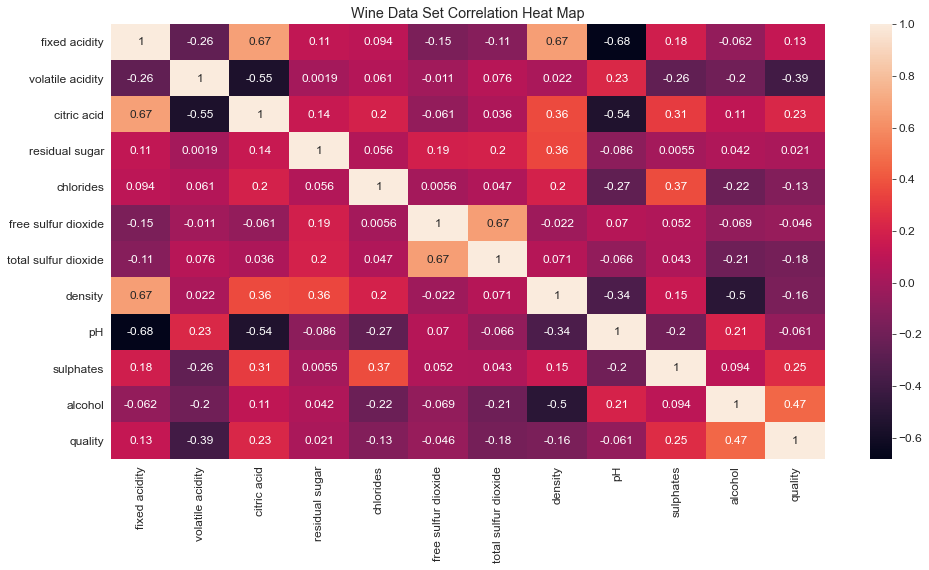

In [6]:
sns.heatmap(wine_df.corr(), annot = True)
plt.title('Wine Data Set Correlation Heat Map')
plt.show()

# Correlation Matrix Explanation
### Q1:
- Based on the heat map there are some columns that have moderately strong relationship with each other at 0.67 corr score which is still 0.13 below the strong relationship mark at > 0.8.
- These columns are fixed acidity and density as well as citric acid and fixed acidity.
- Overall, the data set does not have any strong relationship between the columns that we have to address.

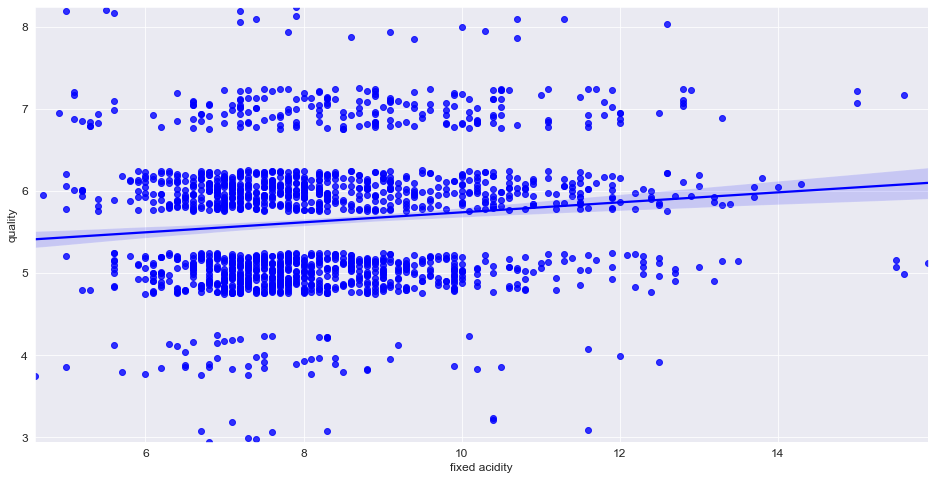

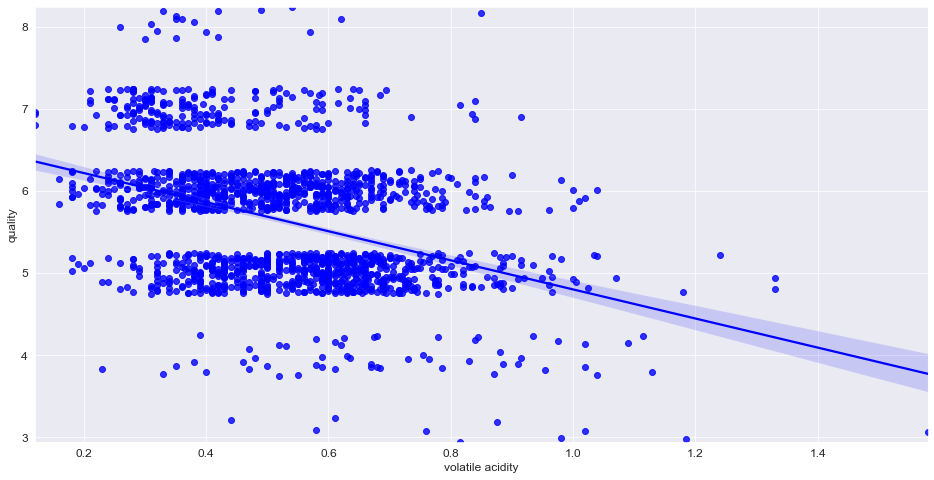

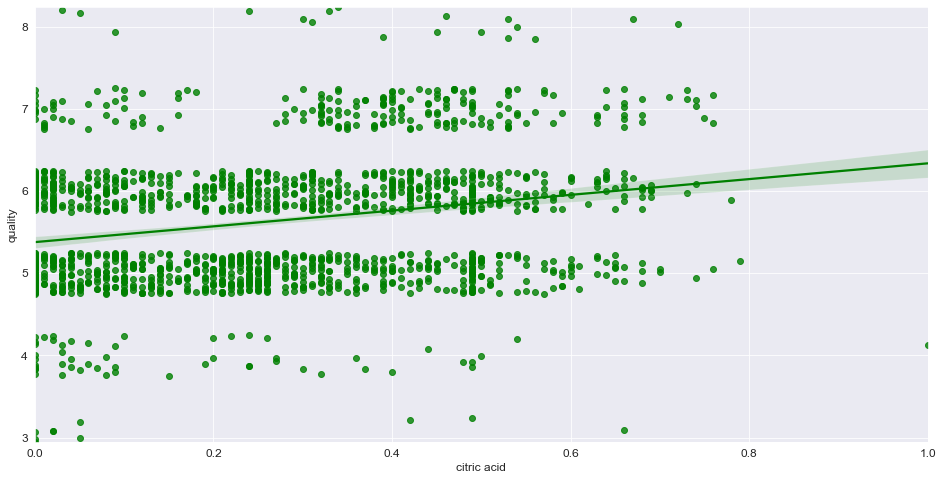

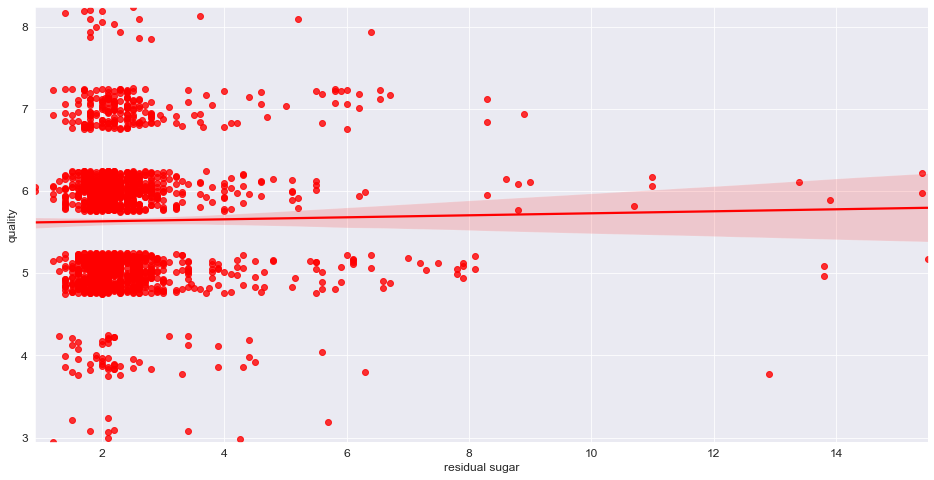

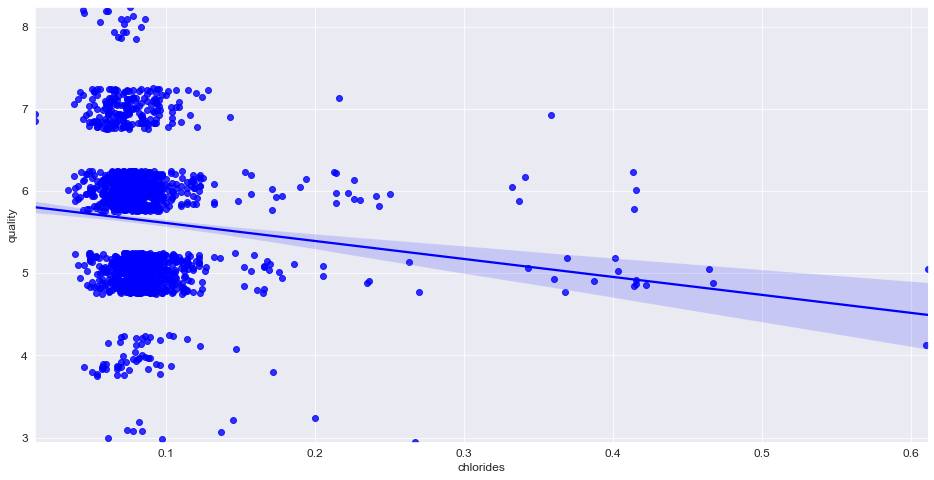

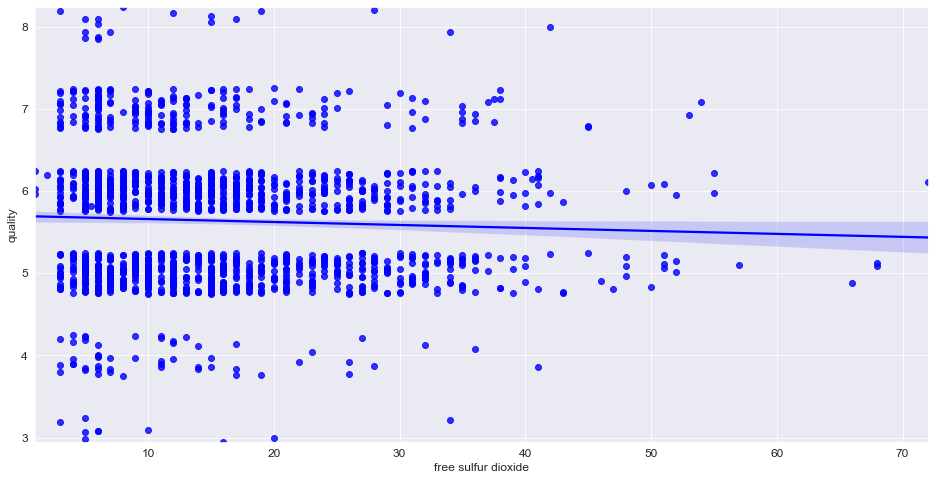

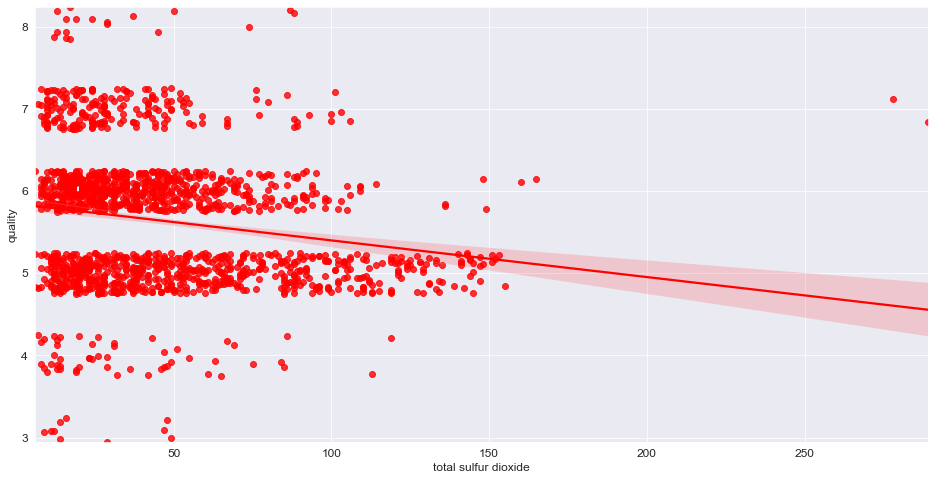

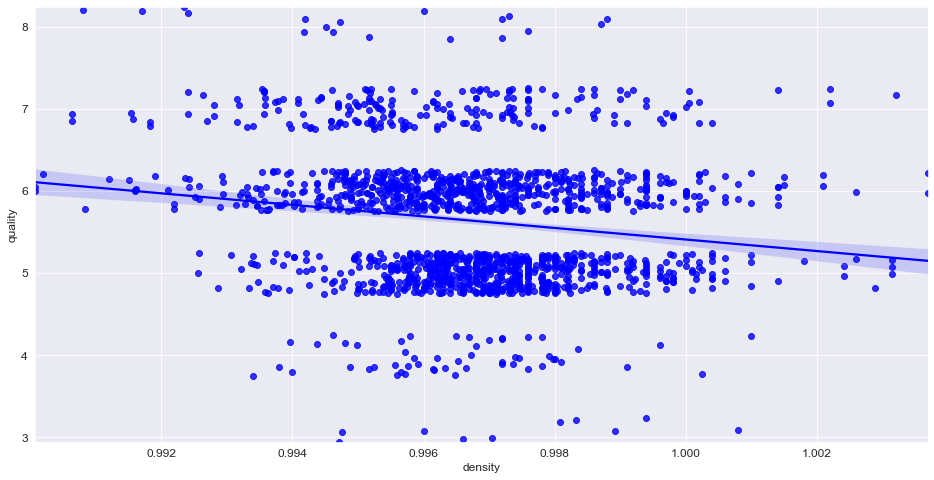

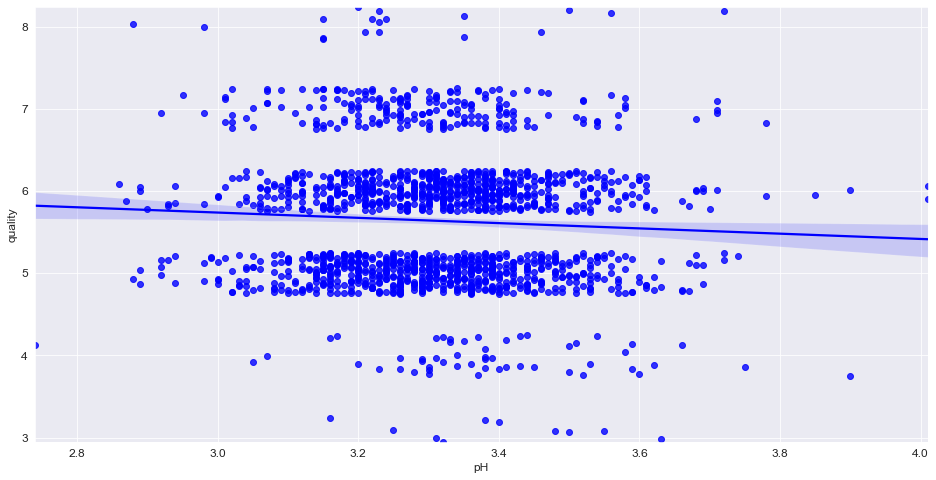

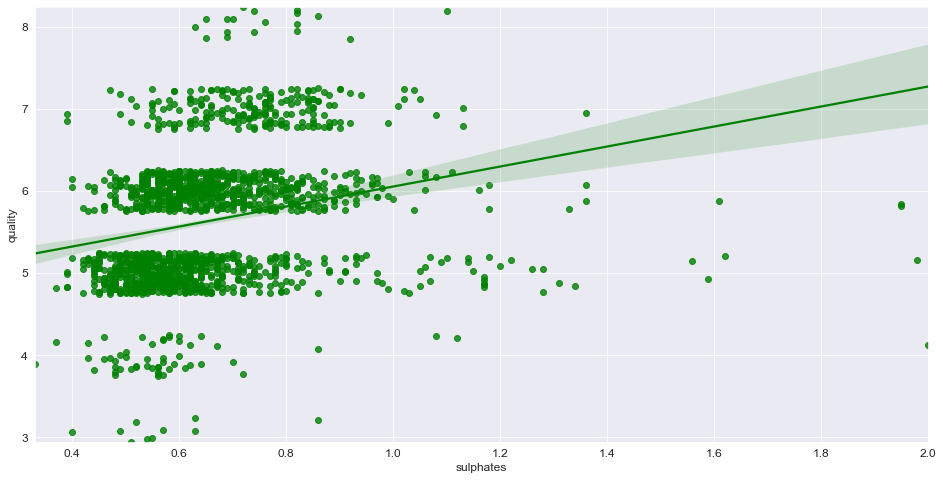

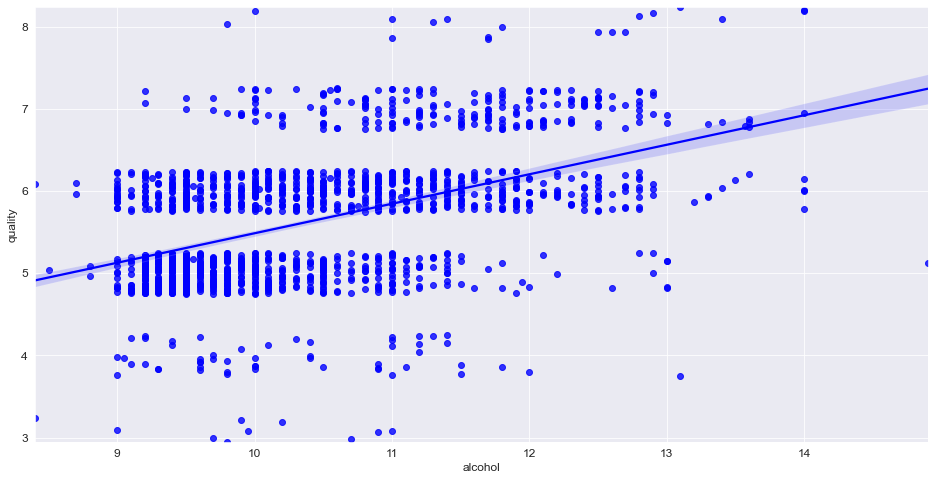

In [7]:
import random
for column in wine_df:
    if column == 'quality':
        next
    else:
        sns.regplot(x = wine_df[column], y = wine_df['quality'], color = random.choice(['red', 'green', 'blue']))
        plt.xlim(wine_df[column].min(), wine_df[column].max())
        plt.ylim(wine_df['quality'].min(), wine_df['quality'].max())
        
        plt.show()

# Analyzing the Reg Plots
### Q2:
- From the 11 reg plots: 
    - Volatile acididty has a strong negative relationship with quality
    - Sulphates has a strong positive relationship with quality
    - Acolhol level also has a strong positive relationship with quality
    - The other columns either has a moderately strong or no real relationship with quality
    
### Q3:
- Taking a look at the value of volatile acidity with quality, we get -0.39. Meanwhile, the correlation values of sulphates and alcohol level with quality are 0.25 and 0.47, respectively. => The graphs re-confirm the 3 strongest relationships with quality which have been shown previously in the correlation matrix.

In [8]:
############################################### DATA CLEANING #################################################################

In [9]:
#To find missing values or null value, we use .info()
wine_df.info()

#There is no missing values that are obvious in this data set. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Q4:
- If there were missing values in the wine data set, I would probably use the mean to fill in the missing values. Specifically because every value is numerical and the each value is distributed within a small range.

### Q5:
- There are no categorical feature in the wine data set. All data in the data set is continuous numerical.

In [10]:
#Independent variables unscaled
X_unscaled = wine_df.drop('quality', axis = 1)
X_unscaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
#Target unscaled
y_unscaled = wine_df['quality']
y_unscaled.head()

0    5.182611
1    4.874886
2    4.755772
3    5.783057
4    5.199293
Name: quality, dtype: float64

In [12]:
#Using MinMaxScaler to scale independent variables
mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X_unscaled)
X_mm = pd.DataFrame(data = X_mm, columns = X_unscaled.columns)
X_mm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [13]:
#Using StandardScaler to scale independent variables
ss_scaler = StandardScaler()
X_ss = ss_scaler.fit_transform(X_unscaled)
X_ss = pd.DataFrame(data = X_ss, columns = X_unscaled.columns)
X_ss.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


## Q6
- The StandardScaler assumes that our data is normally distributed. If our data is not normally distributed then our scaling result will be skewed to one side.

## Q7
- Since linear regression is heavily dependent on scale, doing the linear regression model on unscaled data will yield the same coefficient but in different units.

In [15]:
#Splitting data into train and test batches
train_X_unscaled, train_y_unscaled, test_X_unscaled, test_y_unscaled = train_test_split(X_unscaled, y_unscaled, test_size = 0.2, random_state = 129)
train_X_ss, train_y_ss, test_X_ss, test_y_ss = train_test_split(X_ss, y_unscaled, test_size = 0.2, random_state = 129)
train_X_mm, train_y_mm, test_X_mm, test_y_mm = train_test_split(X_mm, y_unscaled, test_size = 0.2, random_state = 129)

In [ ]:
############################################### MODEL CREATION ###############################################################